In [1]:
import sys
sys.path.append('/home/diego/python/convolution-kernels/')
from kernel.fun import KernelFun as KernelFunNumpy
from kernel.rect import KernelRect as KernelRectNumpy
sys.path = sys.path[:-1]
sys.path.append('/home/diego/python/convolution-kernels-pytorch/')
sys.path.append('/home/diego/python/stochastic-processes/')
from kernel.fun import KernelFun as KernelFunPyTorch

import matplotlib.pyplot as plt
import numpy as np
import torch

from scipy.signal import fftconvolve
from processes.ou import OUProcess

# import kernel.fun.KernelFun as KernelFunNumpy
SEED = 2

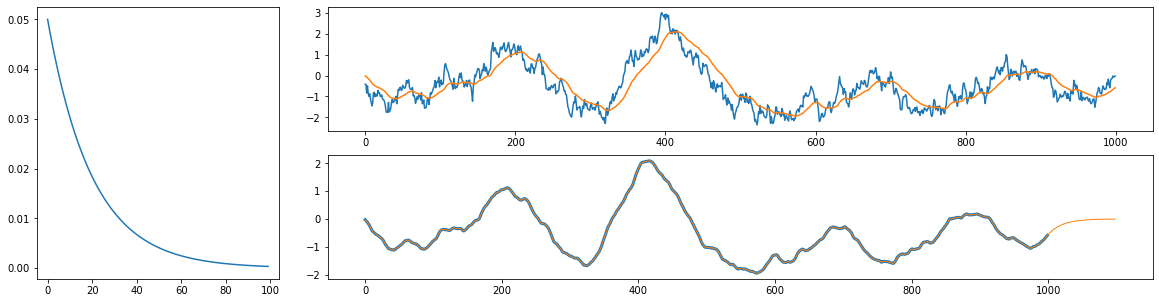

In [66]:
np.random.seed(SEED)

def normal(t, tau, A):
    return A / np.sqrt(2 * np.pi * tau**2) * np.exp(-t**2 / (2 * tau**2))

def exponential(t, tau, A):
    return A / tau * np.exp(-t / tau)

dt = 1

# tau, A = 20, 1
# t_ker = np.arange(-5*tau, 5*tau, 1)
# kerfun = KernelFunNumpy(lambda t, tau: normal(t, tau, A), 
#                basis_kwargs=dict(tau=[tau]), support=[-5*tau, 5*tau])

tau, A, t0 = 20, 1, 0
support = np.array([0, 5*tau]) + t0
t_ker = np.arange(0, 5*tau, dt) + t0
kerfun = KernelFunNumpy(lambda t, tau, t0: exponential(t - t0, tau, A), 
               basis_kwargs=dict(tau=[tau], t0=[t0]), support=support)

y_ker = kerfun.interpolate(t_ker)
arg_support0 = int(kerfun.support[0] / dt)

ou = OUProcess(mu=0, sd=1, tau=50)
t = np.arange(0, 1000, dt)
# arg0, argf = int(len(t) * 0.1), int(len(t) * 0.9)
arg0, argf = int(len(t) * 0), int(len(t) * 1)
x = np.zeros(len(t))
x[arg0:argf] = ou.sample(t[arg0:argf], seed=SEED)[:, 0]

yfun = kerfun.convolve_continuous(t, x)
yfun2 = fftconvolve(x, y_ker, mode='full', axes=0)

fig = plt.figure(figsize=(20, 5), constrained_layout=False)
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, 1:])

ax1.plot(t_ker, y_ker)
ax2.plot(x)
ax2.plot(yfun)
ax3.plot(yfun, lw=3)
ax3.plot(yfun2, lw=1)
# ax3.plot(t, y_torch)

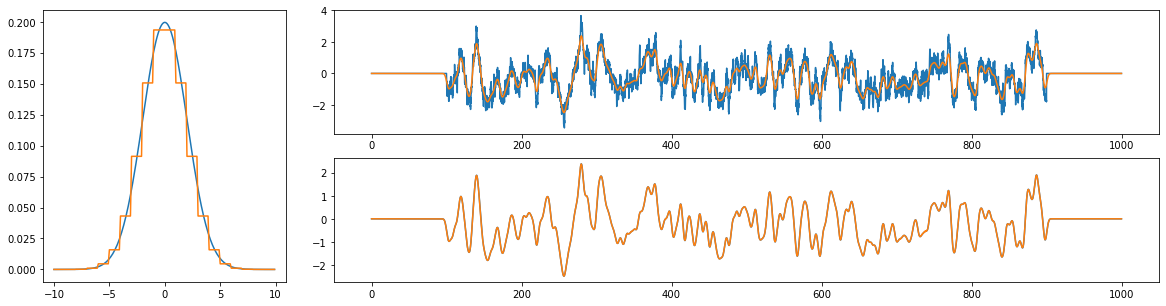

In [3]:
np.random.seed(SEED)

def normal(t, tau, A):
    return A / np.sqrt(2 * np.pi * tau**2) * np.exp(-t**2 / (2 * tau**2))

tau, A = 2, 1
t0, t1 = -tau * 5, tau * 5
t_ker = np.arange(-5*tau, 5*tau, .1)
kerfun = KernelFunNumpy(lambda t, tau: normal(t, tau, A), 
               basis_kwargs=dict(tau=[tau]), support=[-50., 50.])
t_ker_rect = np.arange(-5*tau, 5*tau, 1)
kerrect = KernelRectNumpy(tbins=t_ker_rect, coefs=normal((t_ker_rect[:-1] + t_ker_rect[1:]) / 2, tau, A))
# kerrect = KernelRectNumpy(tbins=t_ker_rect, coefs=np.exp(-t_ker_rect[:-1]**2 / (2 * 10**2)))

ou = OUProcess(mu=0, sd=1, tau=5)
t = np.arange(0, 1000, .1)
arg0, argf = int(len(t) * 0.1), int(len(t) * 0.9)
x = np.zeros(len(t))
x[arg0:argf] = ou.sample(t[arg0:argf], seed=SEED)[:, 0]

yfun = kerfun.convolve_continuous(t, x)
yrect = kerrect.convolve_continuous(t, x)

# y_ker_fft = torch.fft.rfft(torch.from_numpy(y_ker), n=y.shape[0], dim=0)
# x_fft = torch.fft.rfft(torch.from_numpy(x), n=y.shape[0], dim=0)

# y_torch = torch.fft.irfft(y_ker_fft * x_fft, dim=0)

fig = plt.figure(figsize=(20, 5), constrained_layout=False)
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, 1:])

ax1.plot(t_ker, kerfun.interpolate(t_ker))
ax1.plot(t_ker, kerrect.interpolate(t_ker))
ax2.plot(t, x)
ax2.plot(t, yfun)
ax3.plot(t, yfun)
ax3.plot(t, yrect)
# ax.plot(y_torch)

9.992007221626409e-16


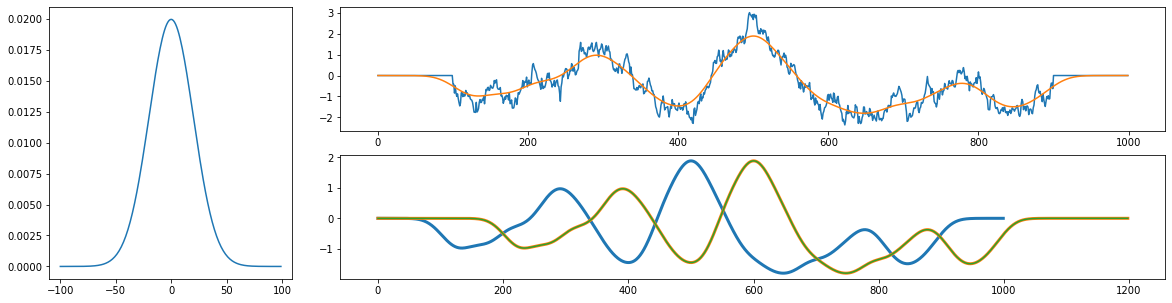

In [99]:
np.random.seed(SEED)

def normal(t, tau, A):
    return A / np.sqrt(2 * np.pi * tau**2) * np.exp(-t**2 / (2 * tau**2))

def exponential(t, tau, A):
    return A / tau * np.exp(-t / tau)

dt = 1

tau, A = 20, 1
t_ker = np.arange(-5*tau, 5*tau, 1)
kerfun = KernelFunNumpy(lambda t, tau: normal(t, tau, A), 
               basis_kwargs=dict(tau=[tau]), support=[-5*tau, 5*tau])

# tau, A, t0 = 20, 1, 0
# support = np.array([0, 5*tau]) + t0
# t_ker = np.arange(0, 5*tau, dt) + t0
# kerfun = KernelFunNumpy(lambda t, tau, t0: exponential(t - t0, tau, A), 
#                basis_kwargs=dict(tau=[tau], t0=[t0]), support=support)


y_ker = kerfun.interpolate(t_ker)
arg_support0, arg_supportf = int(kerfun.support[0] / dt), int(kerfun.support[1] / dt)

ou = OUProcess(mu=0, sd=1, tau=50)
t = np.arange(0, 1000, dt)
arg0, argf = int(len(t) * 0.1), int(len(t) * 0.9)
# arg0, argf = int(len(t) * 0), int(len(t) * 1)
x = np.zeros(len(t))
x[arg0:argf] = ou.sample(t[arg0:argf], seed=SEED)[:, 0]

yfun = kerfun.convolve_continuous(t, x)
yfun2 = fftconvolve(x, y_ker, mode='full', axes=0)

def torch_fftconvolve(x, y, trim=True, dim=0):
    n = x.shape[dim] + y.shape[dim]
    x_fft = torch.fft.rfft(x, n=n, dim=dim)
    y_ker_fft = torch.fft.rfft(_y, n=n, dim=dim)
    full_convolution = torch.fft.irfft(y_ker_fft * x_fft, dim=0)
    if trim:
        conv = torch.zeros(x.shape)
        if arg_support0 >= 0:
            conv[arg_support0:] = full_convolution[:x.shape[dim] - arg_support0]
        elif arg_support0 < 0 and arg_supportf >= 0:
            conv = full_convolution[-arg_support0:x.shape[dim] - arg_support0, ...]
    else:
        conv = y_torch[:-1]
    return conv

trim = True
conv = torch_fftconvolve(torch.from_numpy(x), y_ker, trim=trim)

if trim:
    print(np.max(conv.numpy() - yfun))
else:
    print(np.max(conv.numpy() - yfun2))

fig = plt.figure(figsize=(20, 5), constrained_layout=False)
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, 1:])

ax1.plot(t_ker, kerfun.interpolate(t_ker))
ax2.plot(x)
ax2.plot(yfun)
ax3.plot(yfun, lw=3)
ax3.plot(yfun2, lw=3)
ax3.plot(conv)
# ax3.plot(t, y_torch)

In [75]:
float(conv[0]), yfun2[0]

(-0.020837892370273555, -0.020837892370273697)

In [78]:
conv[-2], yfun2[-1]

(tensor(-7.2813e-06, dtype=torch.float64), -7.281345059406401e-06)

In [92]:
conv.shape, yfun.shape

(torch.Size([1000]), (1000,))

In [91]:
conv.shape, yfun2.shape

(torch.Size([1000]), (1199,))

In [37]:
conv.numpy() - yfun2

ValueError: operands could not be broadcast together with shapes (1200,) (1199,) 

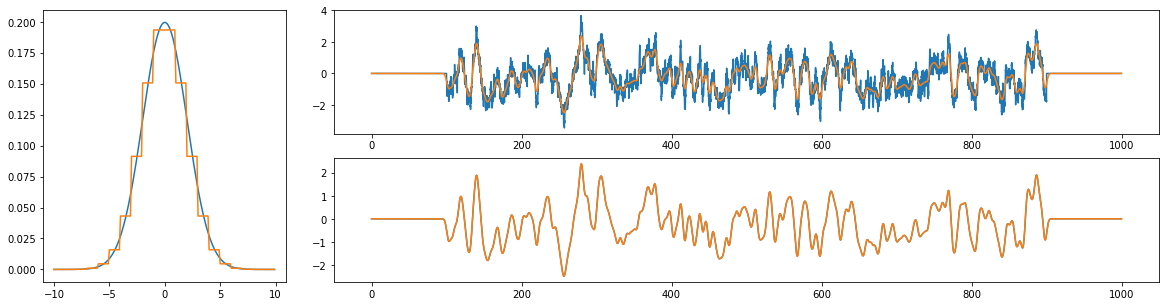

In [6]:
np.random.seed(SEED)

def normal(t, tau, A):
    return A / np.sqrt(2 * np.pi * tau**2) * np.exp(-t**2 / (2 * tau**2))

def exponential(t, tau, A):
    return A / tau * np.exp(-t / 2 * tau)

tau, A = 2, 1
t_ker = np.arange(-5*tau, 5*tau, .1)
kerfun = KernelFunNumpy(lambda t, tau: normal(t, tau, A), 
               basis_kwargs=dict(tau=[tau]), support=[-5*tau, 5*tau])
t_ker_rect = np.arange(-5*tau, 5*tau, 1)
kerrect = KernelRectNumpy(tbins=t_ker_rect, coefs=normal((t_ker_rect[:-1] + t_ker_rect[1:]) / 2, tau, A))

# tau, A, t0 = 2, 1, 100
# dt = .1
# support = np.array([0, 5*tau]) + t0
# t_ker = np.arange(0, 5*tau, dt) + t0
# kerfun = KernelFunNumpy(lambda t, tau, t0: exponential(t - t0, tau, A), 
#                basis_kwargs=dict(tau=[tau], t0=[t0]), support=support)
# t_ker_rect = np.arange(0, 5*tau, 1) + t0
# kerrect = KernelRectNumpy(tbins=t_ker_rect, coefs=exponential((t_ker_rect[:-1] + t_ker_rect[1:]) / 2 - t0, tau, A))


y_ker = kerfun.interpolate(t_ker)
arg_support0 = int(kerfun.support[0] / dt)

ou = OUProcess(mu=0, sd=1, tau=5)
t = np.arange(0, 1000, dt)
arg0, argf = int(len(t) * 0.1), int(len(t) * 0.9)
x = np.zeros(len(t))
x[arg0:argf] = ou.sample(t[arg0:argf], seed=SEED)[:, 0]

yfun = kerfun.convolve_continuous(t, x)
yrect = kerrect.convolve_continuous(t, x)

# y_ker_fft = torch.fft.rfft(torch.from_numpy(y_ker), n=y.shape[0], dim=0)
# x_fft = torch.fft.rfft(torch.from_numpy(x), n=y.shape[0], dim=0)
# y_torch = torch.fft.irfft(y_ker_fft * x_fft, dim=0)

x_fft = torch.fft.rfft(torch.from_numpy(x), dim=0)

npad = x.shape[0] - y_ker.shape[0]
if npad % 2 == 0:
#     _y = torch.cat((torch.zeros(npad // 2), torch.from_numpy(y_ker), torch.zeros(npad // 2)), dim=0)
    _y = torch.cat((torch.from_numpy(y_ker), torch.zeros(npad)), dim=0)
#     _y = torch.fft.rfft(torch.from_numpy(y_ker), n=x.shape[0], dim=0)
#     pass
y_ker_fft = torch.fft.rfft(_y, dim=0)

# y_ker_fft = torch.fft.rfft(torch.cat((torch.from_numpy(y_ker), torch.zeros(x.shape[0] - y_ker.shape[0]))), dim=0)
# y_ker_fft = torch.fft.rfft(torch.from_numpy(y_ker), n=x.shape[0], dim=0)

# y_ker_fft = torch.fft.rfft(torch.cat((torch.zeros(x.shape[0] - y_ker.shape[0]), torch.from_numpy(y_ker))), dim=0)
# y_ker_fft = torch.fft.rfft(torch.cat((torch.from_numpy(y_ker), torch.zeros(x.shape[0] - y_ker.shape[0]))), dim=0)

y_torch = torch.fft.irfft(y_ker_fft * x_fft, dim=0) * .1
conv = torch.zeros(x.shape)
if arg_support0 >= 0:
#     conv[:arg_support0] = y_torch[-arg_support0:, ...]
    conv[arg_support0:] = y_torch[:x.shape[0] - arg_support0]
elif arg_support0 < 0:
    conv[:arg_support0] = y_torch[-arg_support0:, ...]

fig = plt.figure(figsize=(20, 5), constrained_layout=False)
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, 1:])

ax1.plot(t_ker, kerfun.interpolate(t_ker))
ax1.plot(t_ker, kerrect.interpolate(t_ker))
ax2.plot(t, x)
ax2.plot(t, yfun)
ax3.plot(t, yfun)
# ax3.plot(t, yrect)
ax3.plot(t, conv)
# ax3.plot(t, y_torch)

In [225]:
y_torch.shape

torch.Size([10000])

In [173]:
x_fft.shape, y_ker_fft.shape

(torch.Size([5001]), torch.Size([2501]))

In [ ]:
5001

In [166]:
x.shape

(10000,)

In [162]:
y_ker_fft = torch.fft.rfft(torch.from_numpy(y_ker), dim=0)
y_ker2 = torch.fft.irfft(y_ker_fft, n=x.shape[0], dim=0)
# y_ker_fft = torch.fft.rfft(torch.cat((torch.zeros(x.shape[0] - y_ker.shape[0]), torch.from_numpy(y_ker))), dim=0)

In [163]:
# forward
# if even s // 2 + 1
# else (s + 1) //2

# inverse
# if input is even (s - 1)  * 2
# else (s - 1)  * 2

In [164]:
y_ker.shape, y_ker_fft.shape, y_ker2.shape

((200,), torch.Size([101]), torch.Size([10000]))

In [115]:
x.shape, y_ker.shape, y_ker_fft.shape, x_fft.shape, y_torch.shape, y.shape

((10000,),
 (200,),
 torch.Size([5001]),
 torch.Size([5001]),
 torch.Size([10000]),
 (10000,))

In [19]:
y.shape

(2999, 1)